In [ ]:
!pip install opensmile
!pip install sox

     |████████████████████████████████| 4.9 MB 7.4 MB/s 
     |████████████████████████████████| 635 kB 67.5 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 167 kB 74.2 MB/s 
  Created wheel for iso-639: filename=iso_639-0.4.5-py3-none-any.whl size=169061 sha256=ee9e577c626ec8746262c9f4eec03d800efb99dac606b244a2464a5dfdf2988e
  Stored in directory: /root/.cache/pip/wheels/47/60/19/6d020fc92138ed1b113a18271e83ea4b5525fe770cb45b9a2e
Successfully built iso-639


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# import opensmile
import glob
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature Extraction

In [ ]:
smile = opensmile.Smile(
    feature_set = opensmile.FeatureSet.,
    feature_level = opensmile.FeatureLevel.Functionals,
)

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2, random_state=42)
# pca.fit(X)

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
label = np.empty(0, dtype='int')
extracted_features = pd.DataFrame()

In [ ]:
# for actor in tqdm(sorted(glob.glob("/content/drive/MyDrive/SEMOUR_LD/Scripted_Speech/*/"))):
#   #Actor
#     # print(actor)
#     if (actor.split('/')[-2]) == 'Actor_1':
#       for emotion in tqdm(sorted(glob.glob(actor+"/*/"))):
#           #Emotion
#           # print('.')
#         Emotion = emotion.split('/')[-2]

#         if Emotion == 'Anger':
#           for filename in tqdm(sorted(glob.glob(emotion+"/*.wav"))):
#                 #wav file          
#               with open(filename, 'r') as f:
#                 features = smile.process_file(filename)
#                 Emotion = emotion.split('/')[-2]

#                 if Emotion == 'Anger':
#                   label = np.append(label, 0)
#                   extracted_features = extracted_features.append(features)



In [ ]:
# extracted_features['label'] = label 

In [ ]:
# extracted_features.to_pickle("/content/drive/MyDrive/dummy_feature.pkl")

In [ ]:
# unpickled_df = pd.read_pickle("/content/drive/MyDrive/dummy_feature.pkl")
# unpickled_df

In [ ]:
for actor in tqdm(sorted(glob.glob("/content/drive/MyDrive/SEMOUR_LD/Scripted_Speech/*/"))):
  #Actor
    for emotion in tqdm(sorted(glob.glob(actor+"/*/"))):
        #Emotion
      for filename in tqdm(sorted(glob.glob(emotion+"/*.wav"))):
            #wav file
            
        with open(filename, 'r') as f:
          features = smile.process_file(filename)
          Emotion = emotion.split('/')[-2]

          if Emotion == 'Anger':
                  label = np.append(label, 0)
                  extracted_features = extracted_features.append(features)
          # elif Emotion == 'Boredom':
          #         label = np.append(label, 1)
          #         extracted_features = extracted_features.append(features)
          elif Emotion == 'Sadness':
                  label = np.append(label, 2)
                  extracted_features = extracted_features.append(features)
          elif Emotion == 'Happiness':
                  label = np.append(label, 3)
                  extracted_features = extracted_features.append(features)
          elif Emotion == 'Neutral':
                  label = np.append(label, 4)
                  extracted_features = extracted_features.append(features)
          elif Emotion == 'Surprise':
                  label = np.append(label, 5)
                  extracted_features = extracted_features.append(features)
          # elif Emotion == 'Disgust':
          #         label = np.append(label, 6)
          #         extracted_features = extracted_features.append(features)
          # elif Emotion == 'Fearful':
          #         label = np.append(label, 7)
          #         extracted_features = extracted_features.append(features)


extracted_features['label'] = label 
extracted_features.to_pickle("/content/drive/MyDrive/audio_extracted_features.pkl")
extracted_features.to_csv(r'/content/drive/MyDrive/audio_extracted_features.csv', index=False)



/usr/local/lib/python3.7/dist-packages/opensmile/core/smile.py:306: UserWarning: Segment too short, filling with NaN.
  UserWarning("Segment too short, filling with NaN.")


# Feature Selection and Data Preprocessing

In [ ]:
X__extracted_features = pd.read_pickle("/content/drive/MyDrive/audio_extracted_features.pkl")
X__extracted_features

,,,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,audspec_lengthL1norm_sma_percentile99.0,audspec_lengthL1norm_sma_pctlrange0-1,audspec_lengthL1norm_sma_stddev,audspec_lengthL1norm_sma_skewness,audspec_lengthL1norm_sma_kurtosis,audspec_lengthL1norm_sma_meanSegLen,audspec_lengthL1norm_sma_maxSegLen,audspec_lengthL1norm_sma_minSegLen,audspec_lengthL1norm_sma_segLenStddev,audspec_lengthL1norm_sma_upleveltime25,audspec_lengthL1norm_sma_upleveltime50,audspec_lengthL1norm_sma_upleveltime75,audspec_lengthL1norm_sma_upleveltime90,audspec_lengthL1norm_sma_risetime,audspec_lengthL1norm_sma_leftctime,audspec_lengthL1norm_sma_lpgain,audspec_lengthL1norm_sma_lpc0,audspec_lengthL1norm_sma_lpc1,audspec_lengthL1norm_sma_lpc2,audspec_lengthL1norm_sma_lpc3,audspec_lengthL1norm_sma_lpc4,audspecRasta_lengthL1norm_sma_range,audspecRasta_lengthL1norm_sma_maxPos,audspecRasta_lengthL1norm_sma_minPos,audspecRasta_lengthL1norm_sma_quartile1,audspecRasta_lengthL1norm_sma_quartile2,audspecRasta_lengthL1norm_sma_quartile3,audspecRasta_lengthL1norm_sma_iqr1-2,audspecRasta_lengthL1norm_sma_iqr2-3,audspecRasta_lengthL1norm_sma_iqr1-3,...,mfcc_sma_de[12]_peakRangeRel,mfcc_sma_de[12]_peakMeanAbs,mfcc_sma_de[12]_peakMeanMeanDist,mfcc_sma_de[12]_peakMeanRel,mfcc_sma_de[12]_minRangeRel,mfcc_sma_de[12]_meanRisingSlope,mfcc_sma_de[12]_stddevRisingSlope,mfcc_sma_de[12]_meanFallingSlope,mfcc_sma_de[12]_stddevFallingSlope,mfcc_sma_de[13]_flatness,mfcc_sma_de[13]_posamean,mfcc_sma_de[13]_rqmean,mfcc_sma_de[13]_meanPeakDist,mfcc_sma_de[13]_peakDistStddev,mfcc_sma_de[13]_peakRangeAbs,mfcc_sma_de[13]_peakRangeRel,mfcc_sma_de[13]_peakMeanAbs,mfcc_sma_de[13]_peakMeanMeanDist,mfcc_sma_de[13]_peakMeanRel,mfcc_sma_de[13]_minRangeRel,mfcc_sma_de[13]_meanRisingSlope,mfcc_sma_de[13]_stddevRisingSlope,mfcc_sma_de[13]_meanFallingSlope,mfcc_sma_de[13]_stddevFallingSlope,mfcc_sma_de[14]_flatness,mfcc_sma_de[14]_posamean,mfcc_sma_de[14]_rqmean,mfcc_sma_de[14]_meanPeakDist,mfcc_sma_de[14]_peakDistStddev,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,label
file,start,end,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
/content/drive/MyDrive/SEMOUR_LD/Scripted_Speech/Actor_1/Anger/1.wav,0 days,0 days 00:00:00.473106576,4.058659,0.625000,0.000000,0.895754,1.618868,2.402907,0.723114,0.784039,1.507153,0.303974,4.281762,3.977788,1.133754,0.563936,2.422741,0.072000,0.11,0.05,0.024000,0.575000,0.300000,0.125000,0.075000,0.512821,0.605263,0.032996,-2.176077,1.642672,-0.349374,-0.253561,0.154114,5.356080,0.250000,0.975000,1.175630,2.059757,3.807502,0.884127,1.747745,2.631872,...,0.301954,2.812235,3.813718,-2.808071,0.567325,154.407944,52.375572,134.955185,80.660126,0.677973,2.246818,2.839386,0.100000,0.035355,2.041983,0.189795,3.946771,4.172409,-13.651417,0.522477,101.425377,20.053261,115.294106,59.027725,0.501098,4.443209,4.070061,0.145000,0.078262,11.857621,0.648775,5.613305,5.370169,15.010111,0.175311,108.085876,41.074566,127.298073,72.606239,0
/content/drive/MyDrive/SEMOUR_LD/Scripted_Speech/Actor_1/Anger/10.wav,0 days,0 days 00:00:00.841723356,6.842539,0.727273,0.038961,0.052606,0.468090,3.864347,0.415484,3.396257,3.811741,0.049396,6.862217,6.812821,2.192535,0.718242,2.025416,0.118333,0.37,0.03,0.114952,0.441558,0.285714,0.103896,0.025974,0.473684,0.586667,0.055229,-2.218804,1.657001,-0.094908,-0.650779,0.324451,38.313927,0.493506,0.987013,1.001406,1.051384,3.917487,0.049978,2.866103,2.916081,...,0.212417,2.857529,3.03

In [ ]:
X__extracted_features.shape

(9400, 6374)

In [ ]:
X__extracted_features.isnull().any().sum()

6373

In [ ]:
X__extracted_features.isnull().sum().sort_values()

label                                       0
audSpec_Rfilt_sma[1]_peakMeanMeanDist       3
audSpec_Rfilt_sma[1]_peakMeanAbs            3
audSpec_Rfilt_sma[1]_peakRangeRel           3
audSpec_Rfilt_sma[1]_peakRangeAbs           3
                                           ..
audSpec_Rfilt_sma_de[5]_stddev              3
audSpec_Rfilt_sma_de[5]_pctlrange0-1        3
audSpec_Rfilt_sma_de[5]_percentile99.0      3
audSpec_Rfilt_sma_de[5]_iqr1-3              3
pcm_fftMag_psySharpness_sma_de_leftctime    3
Length: 6374, dtype: int64

In [ ]:
X__extracted_features.describe()

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,audspec_lengthL1norm_sma_percentile99.0,audspec_lengthL1norm_sma_pctlrange0-1,audspec_lengthL1norm_sma_stddev,audspec_lengthL1norm_sma_skewness,audspec_lengthL1norm_sma_kurtosis,audspec_lengthL1norm_sma_meanSegLen,audspec_lengthL1norm_sma_maxSegLen,audspec_lengthL1norm_sma_minSegLen,audspec_lengthL1norm_sma_segLenStddev,audspec_lengthL1norm_sma_upleveltime25,audspec_lengthL1norm_sma_upleveltime50,audspec_lengthL1norm_sma_upleveltime75,audspec_lengthL1norm_sma_upleveltime90,audspec_lengthL1norm_sma_risetime,audspec_lengthL1norm_sma_leftctime,audspec_lengthL1norm_sma_lpgain,audspec_lengthL1norm_sma_lpc0,audspec_lengthL1norm_sma_lpc1,audspec_lengthL1norm_sma_lpc2,audspec_lengthL1norm_sma_lpc3,audspec_lengthL1norm_sma_lpc4,audspecRasta_lengthL1norm_sma_range,audspecRasta_lengthL1norm_sma_maxPos,audspecRasta_lengthL1norm_sma_minPos,audspecRasta_lengthL1norm_sma_quartile1,audspecRasta_lengthL1norm_sma_quartile2,audspecRasta_lengthL1norm_sma_quartile3,audspecRasta_lengthL1norm_sma_iqr1-2,audspecRasta_lengthL1norm_sma_iqr2-3,audspecRasta_lengthL1norm_sma_iqr1-3,...,mfcc_sma_de[12]_peakRangeRel,mfcc_sma_de[12]_peakMeanAbs,mfcc_sma_de[12]_peakMeanMeanDist,mfcc_sma_de[12]_peakMeanRel,mfcc_sma_de[12]_minRangeRel,mfcc_sma_de[12]_meanRisingSlope,mfcc_sma_de[12]_stddevRisingSlope,mfcc_sma_de[12]_meanFallingSlope,mfcc_sma_de[12]_stddevFallingSlope,mfcc_sma_de[13]_flatness,mfcc_sma_de[13]_posamean,mfcc_sma_de[13]_rqmean,mfcc_sma_de[13]_meanPeakDist,mfcc_sma_de[13]_peakDistStddev,mfcc_sma_de[13]_peakRangeAbs,mfcc_sma_de[13]_peakRangeRel,mfcc_sma_de[13]_peakMeanAbs,mfcc_sma_de[13]_peakMeanMeanDist,mfcc_sma_de[13]_peakMeanRel,mfcc_sma_de[13]_minRangeRel,mfcc_sma_de[13]_meanRisingSlope,mfcc_sma_de[13]_stddevRisingSlope,mfcc_sma_de[13]_meanFallingSlope,mfcc_sma_de[13]_stddevFallingSlope,mfcc_sma_de[14]_flatness,mfcc_sma_de[14]_posamean,mfcc_sma_de[14]_rqmean,mfcc_sma_de[14]_meanPeakDist,mfcc_sma_de[14]_peakDistStddev,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,label
count,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,...,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9400.000000
mean,3.899627,0.464397,0.156052,0.494890,1.313349,2.332168,0.818460,1.018820,1.837278,0.068243,3.869764,3.801513,1.124478,0.484728,2.355287,0.118003,0.301691,0.037694,0.079620,0.573088,0.333216,0.150262,0.062844,0.443756,0.534992,0.017056,-2.268811,1.772364,-0.350742,-0.295960,0.153600,17.599545,0.207513,0.813666,0.847415,1.370981,2.688648,0.523560,1.317666,1.841234,...,0.494200,3.511577,3.536045,-3.188952,0.512428,141.970215,70.584366,136.225174

In [ ]:
null_data = X__extracted_features[X__extracted_features.isnull().any(axis=1)]

In [ ]:
null_data

,,,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,audspec_lengthL1norm_sma_percentile99.0,audspec_lengthL1norm_sma_pctlrange0-1,audspec_lengthL1norm_sma_stddev,audspec_lengthL1norm_sma_skewness,audspec_lengthL1norm_sma_kurtosis,audspec_lengthL1norm_sma_meanSegLen,audspec_lengthL1norm_sma_maxSegLen,audspec_lengthL1norm_sma_minSegLen,audspec_lengthL1norm_sma_segLenStddev,audspec_lengthL1norm_sma_upleveltime25,audspec_lengthL1norm_sma_upleveltime50,audspec_lengthL1norm_sma_upleveltime75,audspec_lengthL1norm_sma_upleveltime90,audspec_lengthL1norm_sma_risetime,audspec_lengthL1norm_sma_leftctime,audspec_lengthL1norm_sma_lpgain,audspec_lengthL1norm_sma_lpc0,audspec_lengthL1norm_sma_lpc1,audspec_lengthL1norm_sma_lpc2,audspec_lengthL1norm_sma_lpc3,audspec_lengthL1norm_sma_lpc4,audspecRasta_lengthL1norm_sma_range,audspecRasta_lengthL1norm_sma_maxPos,audspecRasta_lengthL1norm_sma_minPos,audspecRasta_lengthL1norm_sma_quartile1,audspecRasta_lengthL1norm_sma_quartile2,audspecRasta_lengthL1norm_sma_quartile3,audspecRasta_lengthL1norm_sma_iqr1-2,audspecRasta_lengthL1norm_sma_iqr2-3,audspecRasta_lengthL1norm_sma_iqr1-3,...,mfcc_sma_de[12]_peakRangeRel,mfcc_sma_de[12]_peakMeanAbs,mfcc_sma_de[12]_peakMeanMeanDist,mfcc_sma_de[12]_peakMeanRel,mfcc_sma_de[12]_minRangeRel,mfcc_sma_de[12]_meanRisingSlope,mfcc_sma_de[12]_stddevRisingSlope,mfcc_sma_de[12]_meanFallingSlope,mfcc_sma_de[12]_stddevFallingSlope,mfcc_sma_de[13]_flatness,mfcc_sma_de[13]_posamean,mfcc_sma_de[13]_rqmean,mfcc_sma_de[13]_meanPeakDist,mfcc_sma_de[13]_peakDistStddev,mfcc_sma_de[13]_peakRangeAbs,mfcc_sma_de[13]_peakRangeRel,mfcc_sma_de[13]_peakMeanAbs,mfcc_sma_de[13]_peakMeanMeanDist,mfcc_sma_de[13]_peakMeanRel,mfcc_sma_de[13]_minRangeRel,mfcc_sma_de[13]_meanRisingSlope,mfcc_sma_de[13]_stddevRisingSlope,mfcc_sma_de[13]_meanFallingSlope,mfcc_sma_de[13]_stddevFallingSlope,mfcc_sma_de[14]_flatness,mfcc_sma_de[14]_posamean,mfcc_sma_de[14]_rqmean,mfcc_sma_de[14]_meanPeakDist,mfcc_sma_de[14]_peakDistStddev,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,label
file,start,end,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
/content/drive/MyDrive/SEMOUR_LD/Scripted_Speech/Actor_2/Anger/73.wav,0 days,0 days 00:00:00.051043084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
/content/drive/MyDrive/SEMOUR_LD/Scripted_Speech/Actor_5/Neutral/3.wav,0 days,0 days 00:00:00.018027211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
/content/drive/MyDrive/SEMOUR_LD/Scripted_Speech/Actor_5/Neutral/4.wav,0 days,0 days 00:00:00.045034014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [ ]:
X__extracted_features = X__extracted_features.dropna()
X__extracted_features.shape 

(9397, 6374)

In [ ]:
X__extracted_features.describe()

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,audspec_lengthL1norm_sma_percentile99.0,audspec_lengthL1norm_sma_pctlrange0-1,audspec_lengthL1norm_sma_stddev,audspec_lengthL1norm_sma_skewness,audspec_lengthL1norm_sma_kurtosis,audspec_lengthL1norm_sma_meanSegLen,audspec_lengthL1norm_sma_maxSegLen,audspec_lengthL1norm_sma_minSegLen,audspec_lengthL1norm_sma_segLenStddev,audspec_lengthL1norm_sma_upleveltime25,audspec_lengthL1norm_sma_upleveltime50,audspec_lengthL1norm_sma_upleveltime75,audspec_lengthL1norm_sma_upleveltime90,audspec_lengthL1norm_sma_risetime,audspec_lengthL1norm_sma_leftctime,audspec_lengthL1norm_sma_lpgain,audspec_lengthL1norm_sma_lpc0,audspec_lengthL1norm_sma_lpc1,audspec_lengthL1norm_sma_lpc2,audspec_lengthL1norm_sma_lpc3,audspec_lengthL1norm_sma_lpc4,audspecRasta_lengthL1norm_sma_range,audspecRasta_lengthL1norm_sma_maxPos,audspecRasta_lengthL1norm_sma_minPos,audspecRasta_lengthL1norm_sma_quartile1,audspecRasta_lengthL1norm_sma_quartile2,audspecRasta_lengthL1norm_sma_quartile3,audspecRasta_lengthL1norm_sma_iqr1-2,audspecRasta_lengthL1norm_sma_iqr2-3,audspecRasta_lengthL1norm_sma_iqr1-3,...,mfcc_sma_de[12]_peakRangeRel,mfcc_sma_de[12]_peakMeanAbs,mfcc_sma_de[12]_peakMeanMeanDist,mfcc_sma_de[12]_peakMeanRel,mfcc_sma_de[12]_minRangeRel,mfcc_sma_de[12]_meanRisingSlope,mfcc_sma_de[12]_stddevRisingSlope,mfcc_sma_de[12]_meanFallingSlope,mfcc_sma_de[12]_stddevFallingSlope,mfcc_sma_de[13]_flatness,mfcc_sma_de[13]_posamean,mfcc_sma_de[13]_rqmean,mfcc_sma_de[13]_meanPeakDist,mfcc_sma_de[13]_peakDistStddev,mfcc_sma_de[13]_peakRangeAbs,mfcc_sma_de[13]_peakRangeRel,mfcc_sma_de[13]_peakMeanAbs,mfcc_sma_de[13]_peakMeanMeanDist,mfcc_sma_de[13]_peakMeanRel,mfcc_sma_de[13]_minRangeRel,mfcc_sma_de[13]_meanRisingSlope,mfcc_sma_de[13]_stddevRisingSlope,mfcc_sma_de[13]_meanFallingSlope,mfcc_sma_de[13]_stddevFallingSlope,mfcc_sma_de[14]_flatness,mfcc_sma_de[14]_posamean,mfcc_sma_de[14]_rqmean,mfcc_sma_de[14]_meanPeakDist,mfcc_sma_de[14]_peakDistStddev,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,label
count,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,...,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000
mean,3.899627,0.464397,0.156052,0.494890,1.313349,2.332168,0.818460,1.018820,1.837278,0.068243,3.869764,3.801513,1.124478,0.484728,2.355287,0.118003,0.301691,0.037694,0.079620,0.573088,0.333216,0.150262,0.062844,0.443756,0.534992,0.017056,-2.268811,1.772364,-0.350742,-0.295960,0.153600,17.599545,0.207513,0.813666,0.847415,1.370981,2.688648,0.523560,1.317666,1.841234,...,0.494200,3.511577,3.536045,-3.188952,0.512428,141.970215,70.584366,136.225174

In [ ]:
X__extracted_features_final = X__extracted_features.drop(['label'], axis=1)
Y__extracted_features_final = X__extracted_features['label']

In [ ]:
X__extracted_features_final.shape

(9397, 6373)

In [ ]:
Y__extracted_features_final.shape

(9397,)

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X__extracted_features_final, Y__extracted_features_final, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7517, 6373), (1880, 6373), (7517,), (1880,))

In [ ]:
#remove constant and quasi constant features

constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [ ]:
X_train_filter.shape, X_test_filter.shape

((7517, 4645), (1880, 4645))

In [ ]:
#remove duplicate features

X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [ ]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [ ]:
X_train_T.duplicated().sum()

1

In [ ]:
duplicated_features = X_train_T.duplicated() 

In [ ]:
duplicated_features

0       False
1       False
2       False
3       False
4       False
        ...  
4640    False
4641    False
4642    False
4643    False
4644    False
Length: 4645, dtype: bool

In [ ]:
features_to_keep = [not index for index in duplicated_features]

X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [ ]:
# data scaling
scaler = StandardScaler().fit(X_train_unique)
X_train_unique = scaler.transform(X_train_unique)
X_test_unique = scaler.transform(X_test_unique)

In [ ]:
X_train_unique = pd.DataFrame(X_train_unique)
X_test_unique = pd.DataFrame(X_test_unique)

In [ ]:
X_train_unique.shape, X_test_unique.shape

((7517, 4644), (1880, 4644))

In [ ]:
# Removal of correlated Feature

# corrmat = X_train_unique.corr()

In [ ]:
#find correlated features
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

corr_features = get_correlation(X_train_unique, 0.70)
print('correlated features: ', len(set(corr_features)) )

correlated features:  3380


In [ ]:
X_train_uncorr = X_train_unique.drop(labels = corr_features, axis = 1)
X_test_uncorr = X_test_unique.drop(labels = corr_features, axis = 1)

In [ ]:
X_train_uncorr.shape, X_test_uncorr.shape

((7517, 1264), (1880, 1264))

In [ ]:
# X_train_uncorr.to_pickle("/content/drive/MyDrive/X_train_uncorr.pkl")
# X_test_uncorr.to_pickle("/content/drive/MyDrive/X_test_uncorr.pkl")

# Classification

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca.fit(X_train_uncorr)

X_train_pca = pca.transform(X_train_uncorr)
X_test_pca = pca.transform(X_test_uncorr)
X_train_pca.shape, X_test_pca.shape

((7517, 2), (1880, 2))

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
run_randomForest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Accuracy on test set: 
0.8973404255319148


In [ ]:
run_randomForest(X_train_pca, X_test_pca, y_train, y_test)

Accuracy on test set: 
0.32180851063829785


SVM

In [ ]:
# Model 
from sklearn.svm import SVC
clf = SVC(gamma = 'auto')

#Train the model using the training sets
clf.fit(X_train_uncorr, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_uncorr)


In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9398936170212766


In [ ]:
# Model 
from sklearn.svm import SVC

clf_optimized = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#Train the model using the training sets
clf_optimized.fit(X_train, y_train)


In [ ]:
#Predict the response for test dataset
y_pred = clf_optimized.predict(X_test)

In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9430851063829787


In [ ]:
#Predict the response for train dataset
y_pred_train = clf_optimized.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score
clf_optimized = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
                    max_iter=-1, probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False)
scores = cross_val_score(clf_optimized, X_train, y_train, cv=5)
scores

array([0.93550532, 0.92021277, 0.93213573, 0.92947438, 0.93745842])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.93 accuracy with a standard deviation of 0.01


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['Anger', 'Sadness', 'Hapiness', 'Neutral', 'Surprise']

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Anger       0.94      0.96      0.95       392
     Sadness       0.94      0.95      0.94       361
    Hapiness       0.95      0.89      0.92       366
     Neutral       0.96      0.97      0.96       385
    Surprise       0.93      0.94      0.93       376

    accuracy                           0.94      1880
   macro avg       0.94      0.94      0.94      1880
weighted avg       0.94      0.94      0.94      1880



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[378,   0,   3,   1,  10],
       [  5, 343,   8,   3,   2],
       [  3,  14, 325,  11,  13],
       [  1,   6,   2, 374,   2],
       [ 14,   2,   5,   2, 353]])

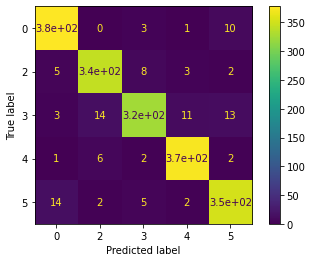

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_optimized, X_test_uncorr, y_test )  
plt.show()  

In [ ]:
import pickle
model_path = '/content/drive/MyDrive/S_E_svm94.pkl'
pickle.dump(clf, open(model_path, 'wb'))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train_uncorr,y_train)

In [ ]:
print(grid.best_estimator_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


# VLogistic regression

In [ ]:
X_train = pd.read_pickle("/content/drive/MyDrive/X_train_uncorr.pkl")
X_test = pd.read_pickle("/content/drive/MyDrive/X_test_uncorr.pkl")

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#Train the model using the training sets
lr.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9207446808510639


In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Anger       0.97      0.94      0.95       392
     Sadness       0.91      0.91      0.91       361
    Hapiness       0.88      0.88      0.88       366
     Neutral       0.96      0.96      0.96       385
    Surprise       0.89      0.93      0.91       376

    accuracy                           0.92      1880
   macro avg       0.92      0.92      0.92      1880
weighted avg       0.92      0.92      0.92      1880



In [ ]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

In [ ]:
print(logreg_cv.best_estimator_)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
clf = xgb.XGBClassifier()

In [ ]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, use_label_encoder=False, verbosity=1)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([3, 2, 3, ..., 5, 0, 3])

In [ ]:
from sklearn.metrics import accuracy_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.926595744680851


# NBSVM

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()

0.7017388096148129

# Hybrid NN

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    #val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    #val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    #plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    #plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K

class Attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(Attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Embedding, Masking,Flatten,GlobalAvgPool1D,GlobalMaxPool1D,Conv1D,LSTM,Bidirectional
model=Sequential()
model.add(
    Embedding(
        input_dim=1264,
        input_length=1264,
        output_dim=32
    )
)
model.add(GlobalMaxPool1D())
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 1264, 32)          40448     
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 165       
Total params: 40,613
Trainable params: 40,613
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

estimator = KerasClassifier(build_fn = baseline_model, epochs = 100, batch_size = 10, verbose = 0)

In [ ]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 10)

In [ ]:
results = cross_val_score(estimator, X_train, y_train)
# Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 1264)              1598960   
_________________________________________________________________
dense_48 (Dense)             (None, 5)                 6325      
Total params: 1,605,285
Trainable params: 1,605,285
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 1264)              1598960   
_________________________________________________________________
dense_50 (Dense)             (None, 5)                 6325      
Total params: 1,605,285
Trainable params: 1,605,285
Non-trainable params: 0
_________________________________________________________________
Model: "se

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Embedding, Masking,Flatten,GlobalAvgPool1D,GlobalMaxPool1D,Conv1D,LSTM,Bidirectional

def baseline_model():
  model = Sequential()

  model.add(Dense(1264, input_dim=1264, activation='relu'))
  # model.add(Conv1D(32,5))
  # model.add(LSTM(32,return_sequences=True))
  model.add(Dense(5, activation='softmax'))

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  # model.summary()
  return model

In [ ]:
estimator = KerasClassifier(build_fn = baseline_model, epochs = 100, batch_size = 50, verbose = True)
results = cross_val_score(estimator, X_train, y_train, cv = kfold )
# # Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/100
121/121 [==============================] - 1s 4ms/step - loss: 0.5243 - accuracy: 0.8206
Epoch 2/100
121/121 [==============================] - 0s 4ms/step - loss: 0.0650 - accuracy: 0.9790
Epoch 3/100
121/121 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9978
Epoch 4/100
121/121 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 0.9995
Epoch 5/100
121/121 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 6/100
121/121 [==============================] - 0s 4ms/step - loss: 9.0022e-04 - accuracy: 1.0000
Epoch 7/100
121/121 [==============================] - 0s 4ms/step - loss: 7.1693e-04 - accuracy: 1.0000
Epoch 8/100
121/121 [==============================] - 0s 3ms/step - loss: 5.8798e-04 - accuracy: 1.0000
Epoch 9/100
121/121 [==============================] - 0s 4ms/step - loss: 4.9366e-04 - accuracy: 1.0000
Epoch 10/100
121/121 [==============================] - 0s 4ms/step - loss:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Embedding, Masking,Flatten,GlobalAvgPool1D,GlobalMaxPool1D,Conv1D,LSTM,Bidirectional

model_2=Sequential()
model_2.add(
    Embedding(
        input_dim=1264,
        input_length=1264,
        output_dim=32,
        trainable=False
    )
)

model_2.add(Conv1D(32,5))
model_2.add(LSTM(32,return_sequences=True))
model_2.add(Attention(return_sequences=False))
model_2.add(Flatten())
model_2.add(Dense(32,activation="relu"))
model_2.add(Dense(8,activation="relu"))
model_2.add(Dense(5, activation='softmax'))

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1264, 32)          40448     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1260, 32)          5152      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1260, 32)          8320      
_________________________________________________________________
attention (Attention)        (None, 32)                1292      
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 8)                

In [ ]:
estimator = KerasClassifier(build_fn = baseline_model, epochs = 80, batch_size = 50, verbose = True)
results = cross_val_score(estimator, X_train, y_train, cv = kfold )
# # Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
history = model_2.fit(X_train, y_train,
                    epochs=12,
                    verbose=False,
                    batch_size=50)
loss, accuracy = model_2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Epoch 1/20
151/151 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.7448
Epoch 2/20
151/151 [==============================] - 0s 3ms/step - loss: 0.5775 - accuracy: 0.7692
Epoch 3/20
151/151 [==============================] - 0s 3ms/step - loss: 0.5796 - accuracy: 0.7693
Epoch 4/20
151/151 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.7648
Epoch 5/20
151/151 [==============================] - 0s 3ms/step - loss: 0.5792 - accuracy: 0.7671
Epoch 6/20
151/151 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.7742
Epoch 7/20
151/151 [==============================] - 0s 3ms/step - loss: 0.5299 - accuracy: 0.7922
Epoch 8/20
151/151 [==============================] - 0s 3ms/step - loss: 0.4982 - accuracy: 0.8080
Epoch 9/20
151/151 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.8098
Epoch 10/20
151/151 [==============================] - 0s 3ms/step - loss: 0.5298 - accuracy: 0.7860

In [ ]:
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import GRU, Dense, Dropout, Embedding, Masking,Flatten,GlobalAvgPool1D,GlobalMaxPool1D,Conv1D,LSTM,Bidirectional, MaxPooling1D
  from keras.layers import SpatialDropout1D


  model=Sequential()
  model.add(Dense(1264, input_dim=1264, activation='relu'))
  # model.add(Dense(800, activation='relu'))
  model.add(Dense(6, activation='softmax'))

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model.summary()
  # return model

  # model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1264)              1598960   
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 7590      
Total params: 1,606,550
Trainable params: 1,606,550
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=1,
                    verbose=False,
                    batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
# plot_history(history)

Training Accuracy: 0.7515
Testing Accuracy:  0.7122


In [ ]:
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import GRU, Dense, Dropout, Embedding, Masking,Flatten,GlobalAvgPool1D,GlobalMaxPool1D,Conv1D,LSTM,Bidirectional, MaxPooling1D
  from keras.layers import SpatialDropout1D


  model=Sequential()
  model.add(Conv1D(filters=1264, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2])))
  model.add(Dense(1264, input_dim=1264, activation='relu'))
  # model.add(Dense(800, activation='relu'))
  model.add(Dense(y_train.shape[1], activation='softmax'))

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model.summary()
  # return model

  # model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1264, 32)          40448     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1260, 32)          5152      
_________________________________________________________________
dense_14 (Dense)             (None, 1260, 32)          1056      
_________________________________________________________________
dense_15 (Dense)             (None, 1260, 5)           165       
Total params: 46,821
Trainable params: 6,373
Non-trainable params: 40,448
_________________________________________________________________
